<a href="https://colab.research.google.com/github/melikesifa/assignments/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfBnk = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank-full.csv')

In [4]:
dfBnk.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Analyze Data

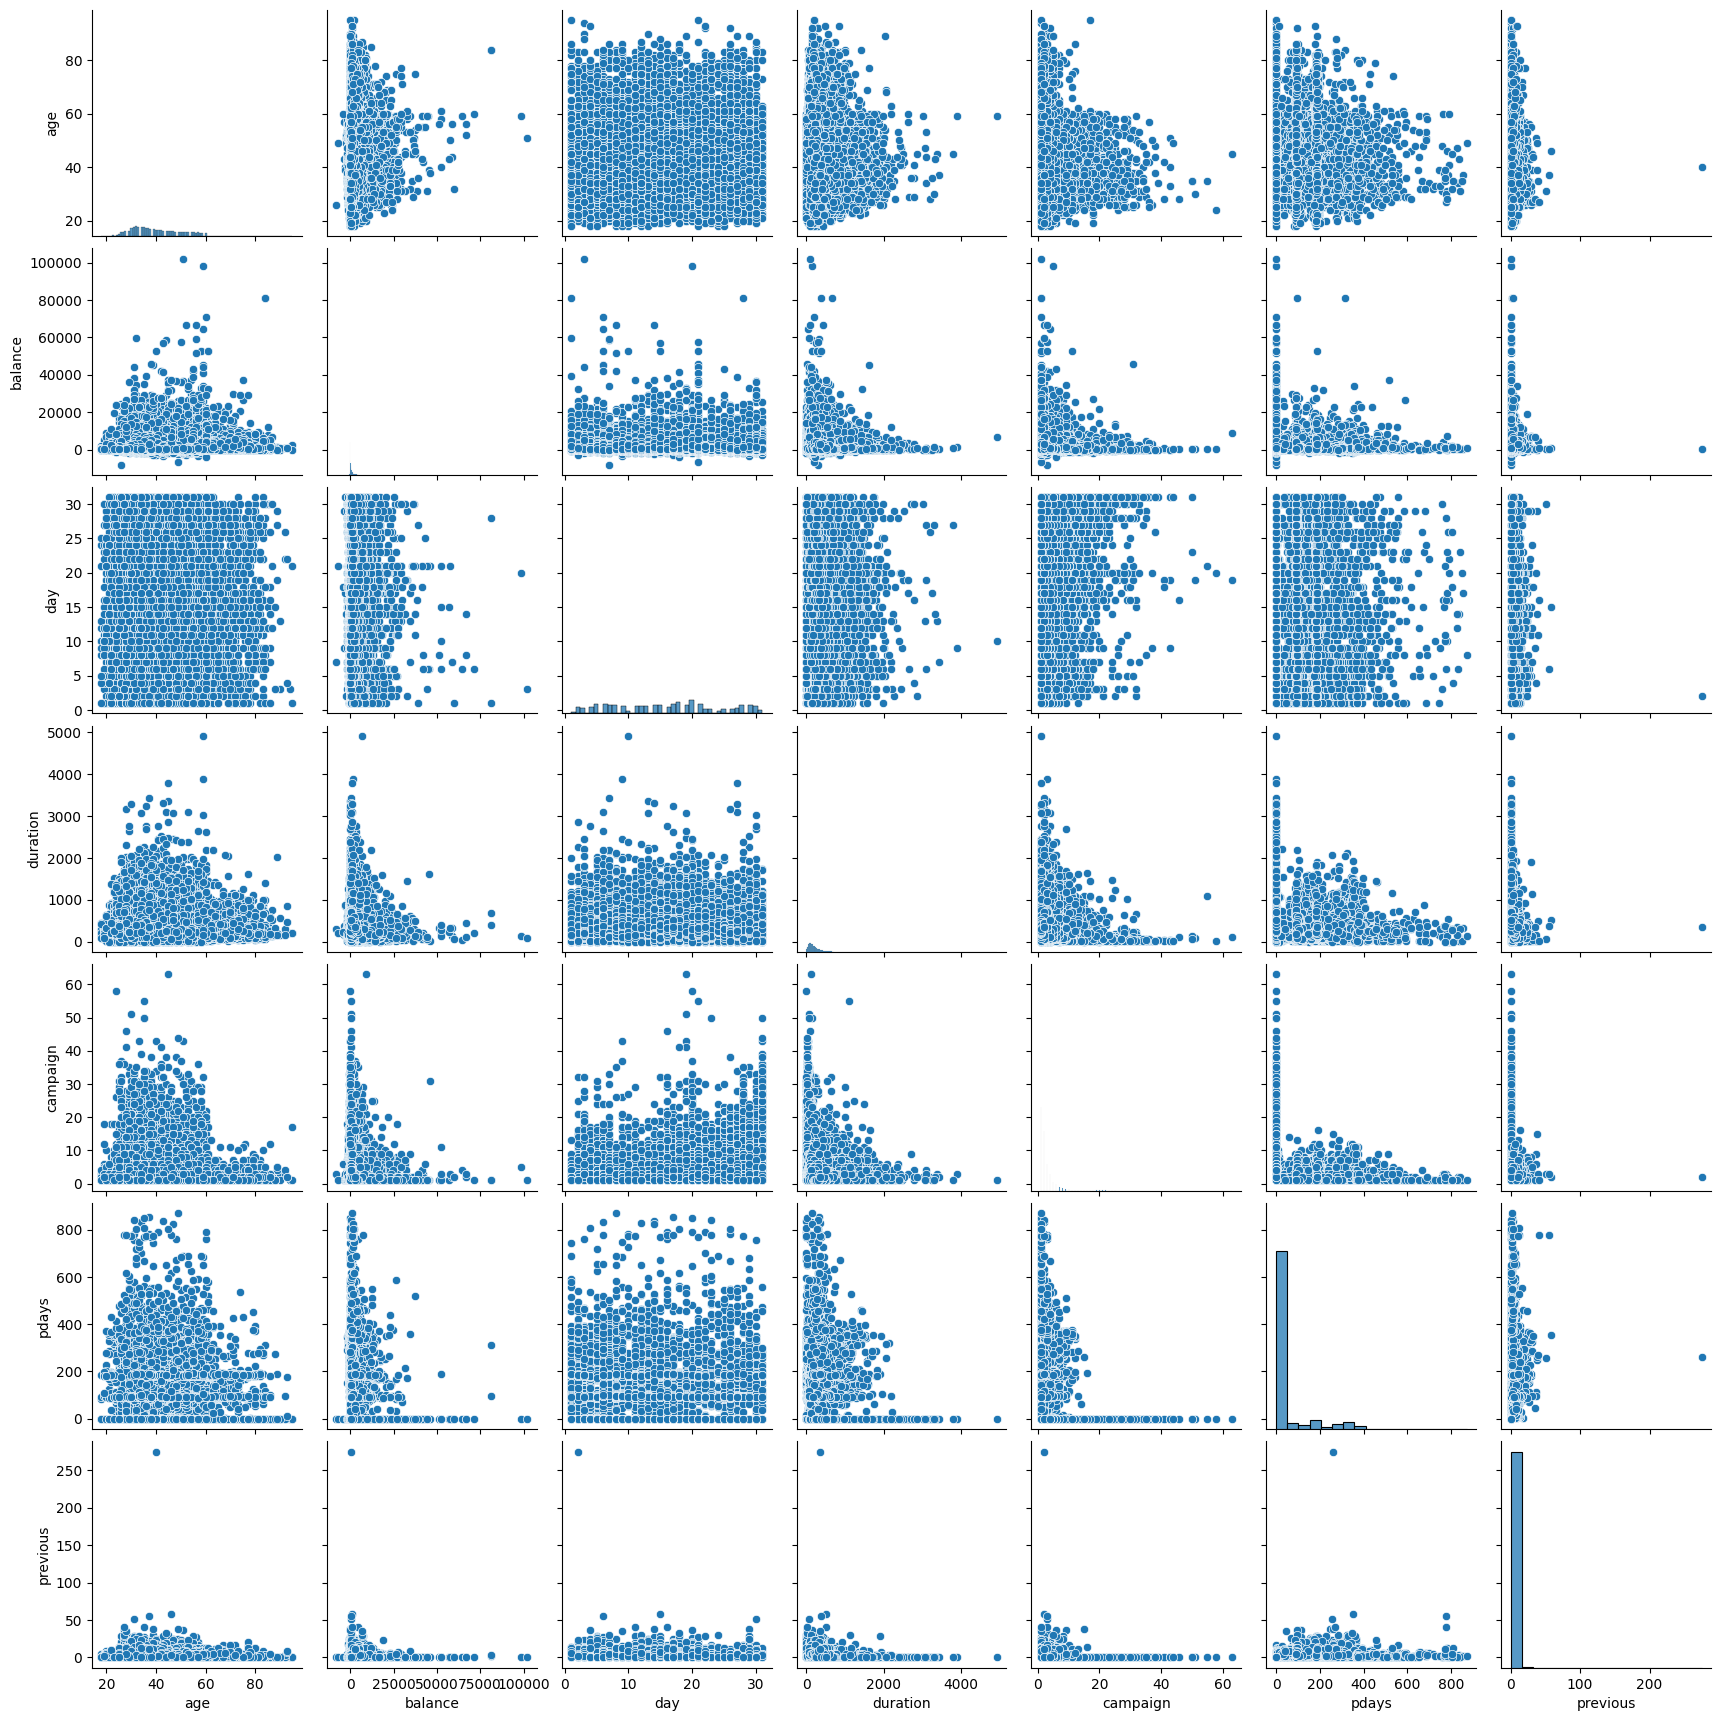

In [5]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfBnk)

There appears to be some correlation between some of the variables. For example:

Age vs. Balance: Older individuals may have higher balances.

Duration is likely correlated with the target variable y (subscription to term deposit).

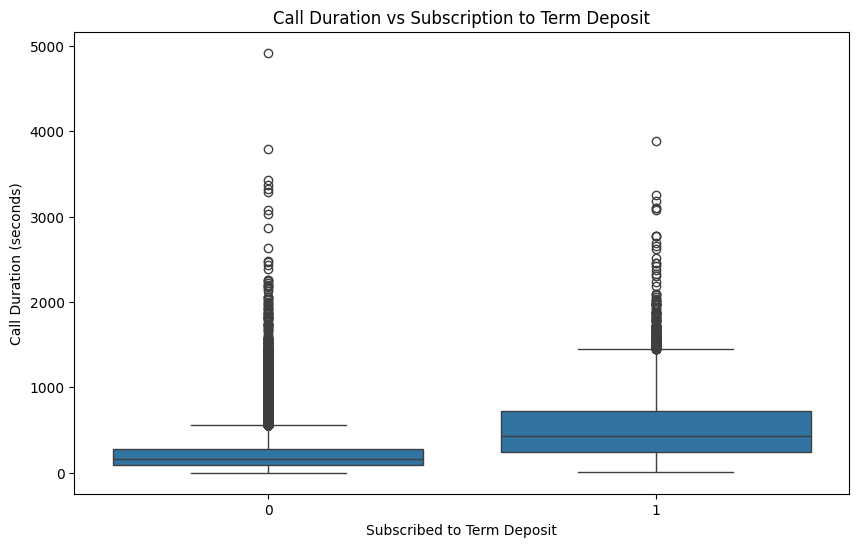

In [6]:
dfBnk['y'] = dfBnk['y'].map({'yes': 1, 'no': 0})

# Plot the relationship between call duration and target variable 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=dfBnk)
plt.title('Call Duration vs Subscription to Term Deposit')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Call Duration (seconds)')
plt.show()

Longer calls are associated with a higher likelihood of subscription.


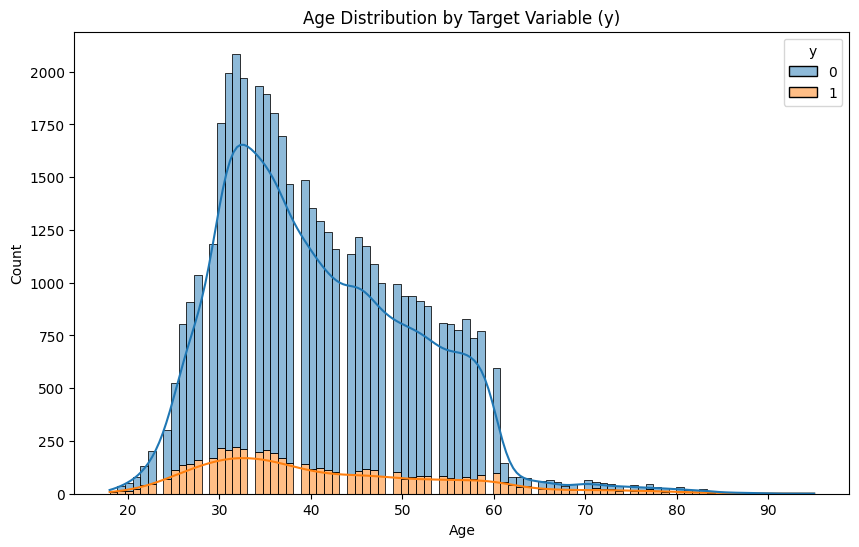

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfBnk, x='age', hue='y', multiple='stack', kde=True)
plt.title('Age Distribution by Target Variable (y)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The majority of the clients are between 30-40 years old.

## Predict Cholesterol Levels

We will not be able to use Linear Regression because our target variable is binary and not continuous.  So, let's transform the linear model into something that would split the output into two 'classes'...

### Logistic Regression

WHITEBOARD >>

In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function( logistic function). The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. Typically, if the squashed value is greater than a threshold value we assign it a label 1, else we assign it a label 0.

In [8]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
import pandas as pd

y = dfBnk['y']
X = dfBnk.drop(['y'], axis=1)

# Identify columns with non-numeric data
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# One-hot encode non-numeric columns
X_encoded = pd.get_dummies(X, columns=non_numeric_cols)

# Scale the numerical data
X_scaled = scale(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,train_size=0.8, test_size=0.2,random_state=1)

In [9]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrHrt = LogisticRegression(random_state=1)
mdlLgrHrt.fit(X_train, y_train)
y_test_pred = mdlLgrHrt.predict(X_test)

Since target is binary and not continuous, we cannot directly compare the prediction with the actual.  So, let's view the model result in a table - also known as a **Confusion Matrix**.

In [10]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[7786  207]
 [ 704  346]]


#### Detailed calcs

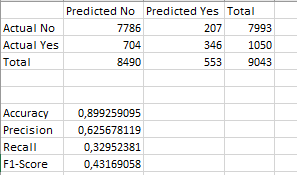

## Metric 1: F1-score
The F1-score is simply the harmonic mean of the precision and recall

In [11]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7993
           1       0.63      0.33      0.43      1050

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043



## Metric 2: ROC AUC Score

To summarize all the performance results into a single number, let's plot the
True Positive Rate (TPR) = TP / (TP + FN) = 25/31
against
False Positive Rate (FPR) = FP / (FP + TN) = 10/30

An **ROC (Receiver Operating Characteristic) curve** plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

A higher value for the area under this ROC curve, aka **AUC**, signifies a better model.

In [12]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.6518130745354567


Now that we have one working model with acceptable results, let's see if we can improve it by trying out some other models...

utexas_ds_orie_divider_gray.png

### Naive Bayes
This is a different way of getting to a similar outcome. Naive Bayes is a probabilistic model that uses Bayes Theorem to predict probability of target value given features based on the probability of features given the target.

<< WHITEBOARD

#### Naive Bayes - Gaussian
Since the pairplot showed normally distributed features (along the diagonal), the Gaussian Naive Bayes would be a good model to try...

In [13]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbgBnk = GaussianNB()
mdlNbgBnk.fit(X_train,y_train)
y_test_pred = mdlNbgBnk.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7993
           1       0.39      0.52      0.45      1050

    accuracy                           0.85      9043
   macro avg       0.66      0.71      0.68      9043
weighted avg       0.87      0.85      0.86      9043

AUC Score:
0.7084064032218668


### K-Nearest Neighbor (KNN)
This is yet another way of getting to a similar outcome, but this time using cartesian distances to determine how close or far a new data point is to the previous data points.

WHITEBOARD >>

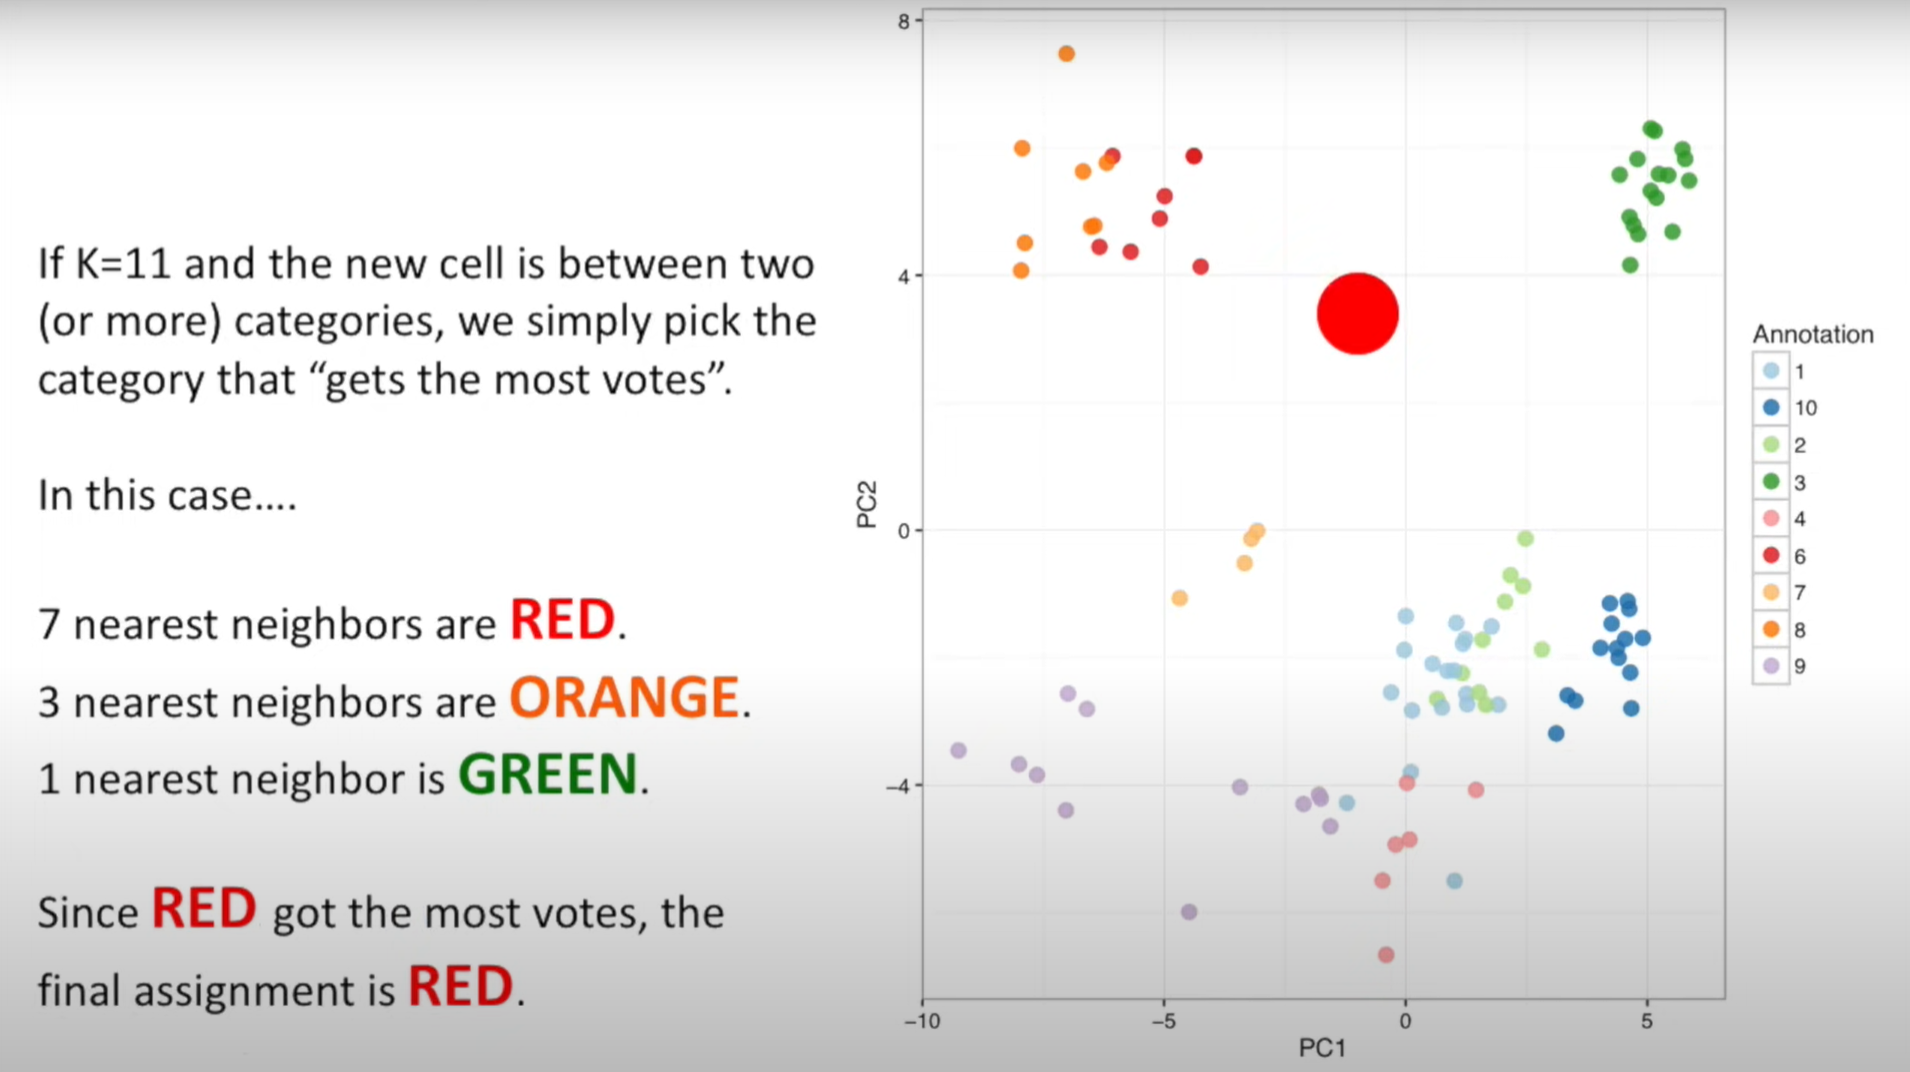

<< WHITEBOARD

In [14]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnnBnk = KNeighborsClassifier(n_neighbors=10)
mdlKnnBnk.fit(X_train, y_train)
y_test_pred = mdlKnnBnk.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
0.6071200395584232


Let's try a different type of classification model before we wrap up...

### Support Vector Machines
While Logistic Regression and Naive Bayes are probabilistic models, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

In [15]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvmBnk = SVC()
mdlSvmBnk.fit(X_train, y_train)
y_test_pred = mdlSvmBnk.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7993
           1       0.66      0.35      0.45      1050

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

AUC Score:
0.661284516809351


Based on all the above models, it seems like Naive Bayes - Gaussian gives us the best results with an AUC score of 71%.  

utexas_ds_orie_divider_gray.png